In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    @MafeCarrascal
    @CathyJuvinao
    @FabianSanabriaS
    @DanielSamperO
    @ClaudiaLopez
    @AngelicaLozanoC
    @AntanasMockus
    @ArielAnaliza
    @datoatipico
    @Rivas_Santiago
    @Uriasv
    @cielo_rusinque
    @MeDicenWally
    @intiasprilla
    @navarrowolff
    @angelamrobledo
    @DavidRacero
    @MirandaBogota
    @MauroToroO
    @conycamelo
    @eljulisastoque
    @JULIOC_HERRERA
    @AlvaroUribeVel
    @MariaFdaCabal
    @natiibedoya
    @CatalinaSuarezB
    @MiguelPoloP

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["cuentas_tweets_0.json","cuentas_tweets_1.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 338752 
 Tweets con usuario identificado     : 338752 
 Tweets con nombre de usuario        : 338752 
 Total de Menciones en los tweets    : 947488 
 Tweets con menciones identificadas  : 338752 
 Tweets con dispositivos registrado  : 338752 
 Tweets con fechas registradas       : 338752 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 61805


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    216977
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       65521
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28373
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  22622
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         3999
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        308
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>           203
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>              203
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    151
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>             40
<a href="https://twitterrific.com/ios" rel="

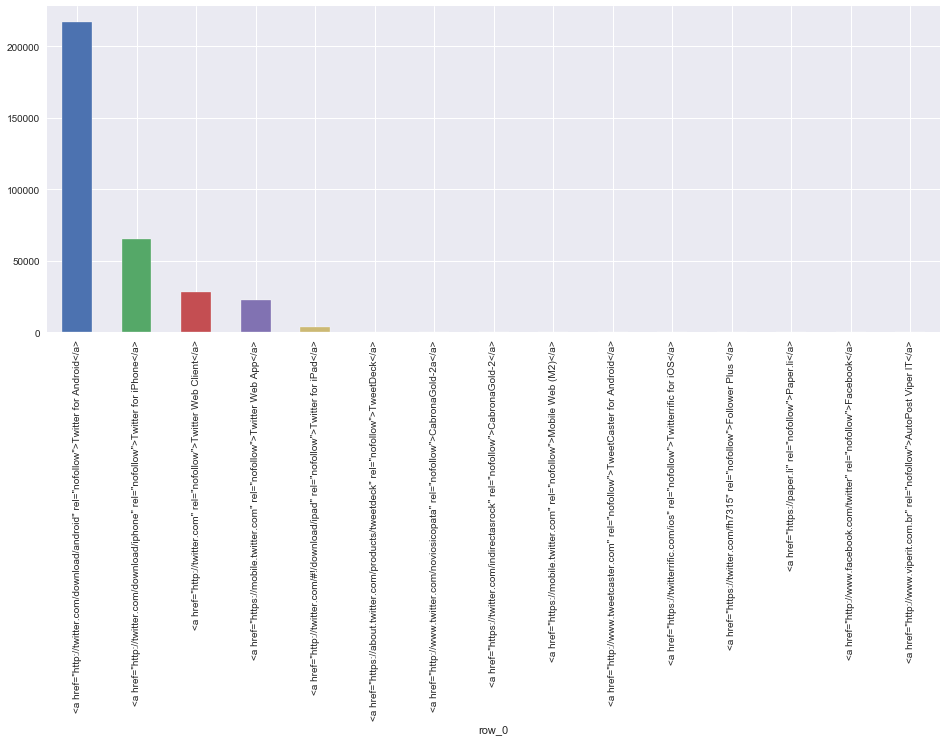

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


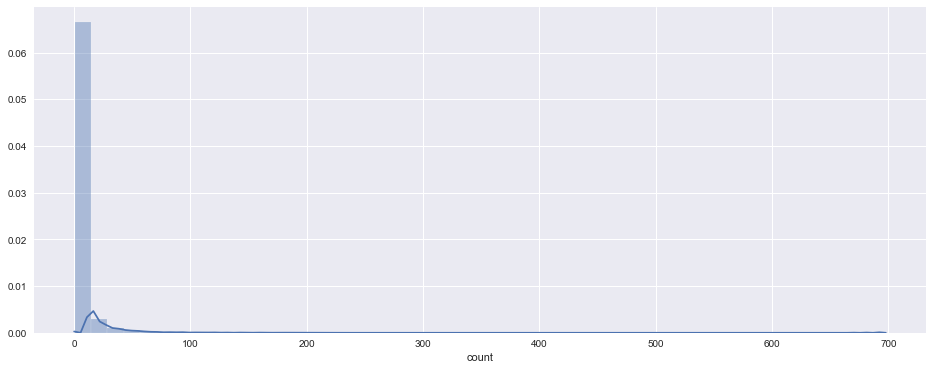

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    61805.000
mean         5.481
std         16.434
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        697.000
Name: count, dtype: float64

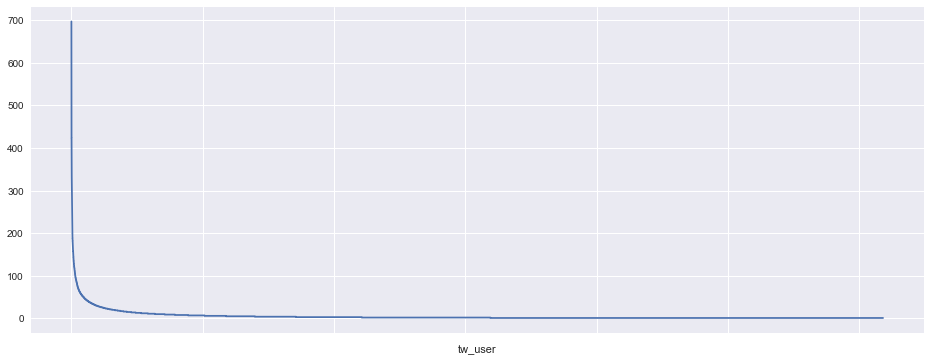

In [8]:
ids_freqs.plot(figsize=(16, 6))

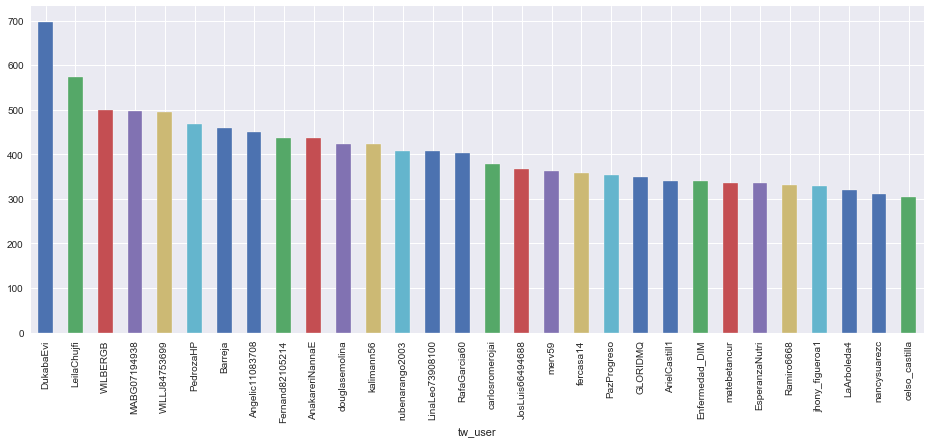

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
DukabaEvi          697
LeilaChujfi        574
WILBERGB           499
MABG07194938       497
WILLJ84753699      496
PedrozaHP          467
Barreja            459
Angelic11083708    450
Fernand82105214    437
AnakareriNannaE    437
douglasemolina     424
kalimann56         424
rubenarango2003    408
LinaLeo73908100    407
RafaGarcia60       404
carlosromerojai    378
JosLuis66494688    367
merv59             362
fercasa14          357
PazProgreso        353
GLORIDMQ           349
ArielCastill1      341
Enfermedad_DIM     339
matebetancur       336
EsperanzaNutri     335
Ramiro6668         332
jhony_figueroa1    329
LaArboleda4        320
nancysuarezc       312
celso_castilla     304
dresCaicedo        302
nos_verdad         299
H_U_V_A            297
Camava3            295
Colombia_y_yo      291
alejopereira27     286
argkon             276
mareba82           274
aarangob11         272
rafistan73         271
8698599j           263
alfredoboita       262
EdwinGaviria17     261
ern

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

23747

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 23791


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(338752, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

DanielSamperO      36350
MafeCarrascal      33676
Uriasv             33459
ClaudiaLopez       29072
natiibedoya        17579
IvanDuque          16641
petrogustavo       14160
navarrowolff       13270
angelamrobledo     11436
VickyDavilaH       11421
CathyJuvinao       10596
DavidRacero         9378
MariaFdaCabal       8872
matadoreltiempo     8097
Rivas_Santiago      7867
AngelicaLozanoC     7467
AlvaroUribeVel      6573
NanyPardo           5160
FabianSanabriaS     4812
GarciaColorad0      4654
dtype: int64


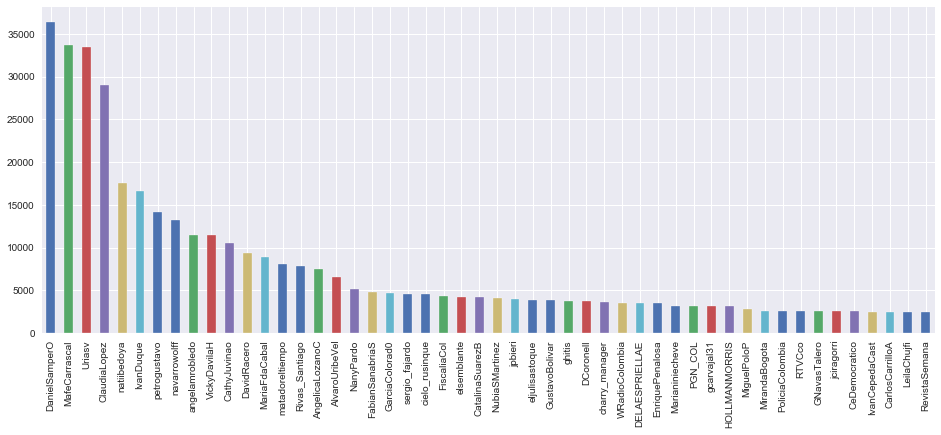

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

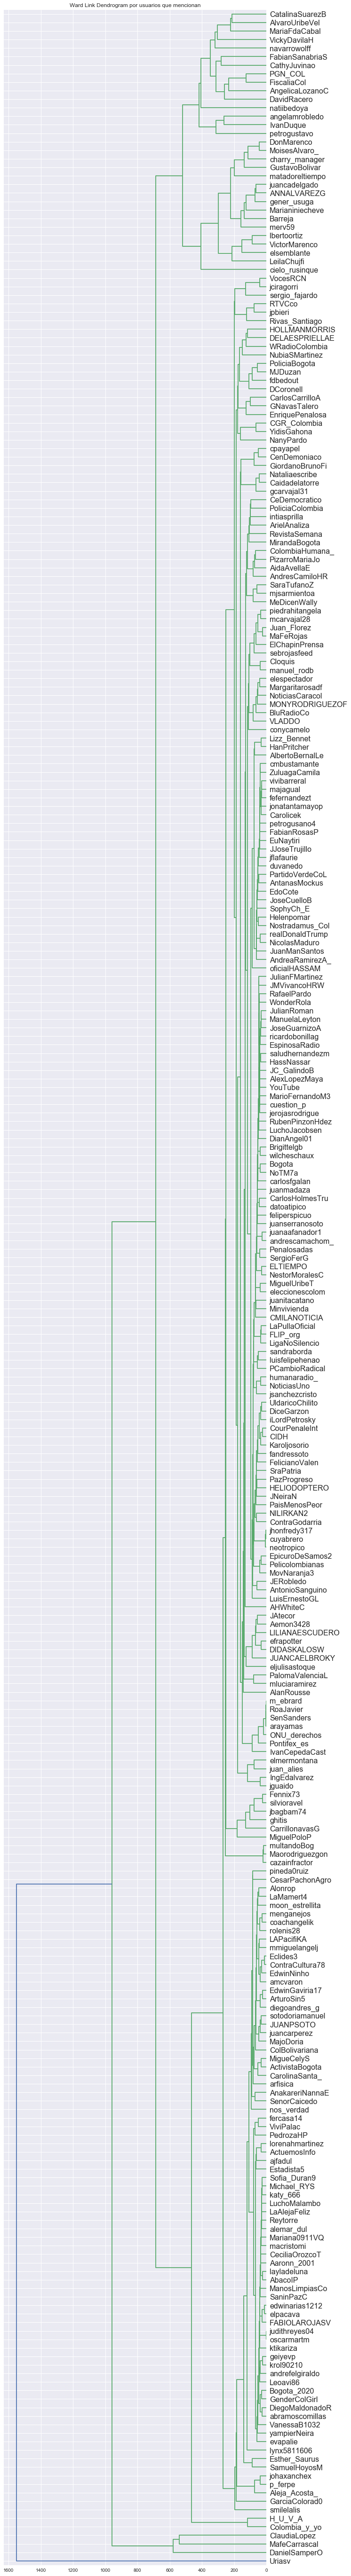

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        2059.0
Barreja            1434.0
merv59             1274.0
WILBERGB            969.0
AnakareriNannaE     938.0
DonMarenco          929.0
DukabaEvi           871.0
douglasemolina      861.0
GLORIDMQ            836.0
WILLJ84753699       786.0
Angelic11083708     778.0
Fernand82105214     755.0
ariasen978          746.0
H_U_V_A             720.0
wilromerol          697.0
MABG07194938        694.0
Colombia_y_yo       694.0
fercasa14           672.0
PedrozaHP           650.0
PazProgreso         621.0
kalimann56          621.0
LinaLeo73908100     610.0
maxmaye15354547     595.0
CarrillonavasG      594.0
rubenarango2003     591.0
ArielCastill1       578.0
Enfermedad_DIM      564.0
matebetancur        553.0
ernesto1972m6       547.0
JosLuis66494688     545.0
RafaGarcia60        532.0
carlosromerojai     516.0
nancysuarezc        515.0
Helenpomar          515.0
Ramiro6668          511.0
EsperanzaNutri      511.0
MiguelPopPolo1      502.0
Miryam78151448      497.0
LaArboleda4 

In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

DanielSamperO      36350.0
MafeCarrascal      33676.0
Uriasv             33459.0
ClaudiaLopez       29072.0
natiibedoya        17579.0
IvanDuque          16641.0
petrogustavo       14160.0
navarrowolff       13270.0
angelamrobledo     11436.0
VickyDavilaH       11421.0
CathyJuvinao       10596.0
DavidRacero         9378.0
MariaFdaCabal       8872.0
matadoreltiempo     8097.0
Rivas_Santiago      7867.0
AngelicaLozanoC     7467.0
AlvaroUribeVel      6573.0
NanyPardo           5160.0
FabianSanabriaS     4812.0
GarciaColorad0      4654.0
sergio_fajardo      4608.0
cielo_rusinque      4525.0
FiscaliaCol         4360.0
elsemblante         4250.0
CatalinaSuarezB     4210.0
NubiaSMartinez      4107.0
jpbieri             3952.0
eljulisastoque      3883.0
GustavoBolivar      3826.0
ghitis              3802.0
DCoronell           3787.0
charry_manager      3614.0
WRadioColombia      3541.0
DELAESPRIELLAE      3506.0
EnriquePenalosa     3482.0
Marianiniecheve     3222.0
PGN_COL             3195.0
g

# Temporalidad

In [57]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [62]:
time_sample="600S"

In [63]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

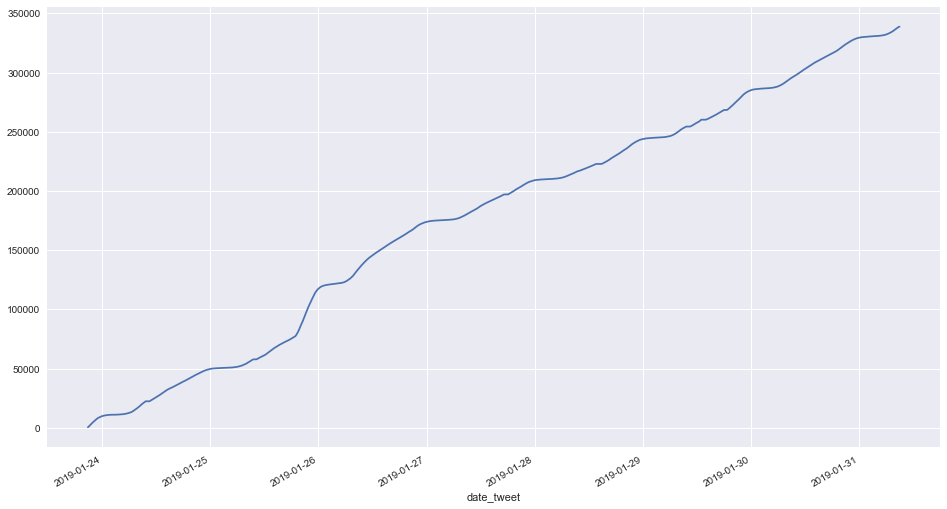

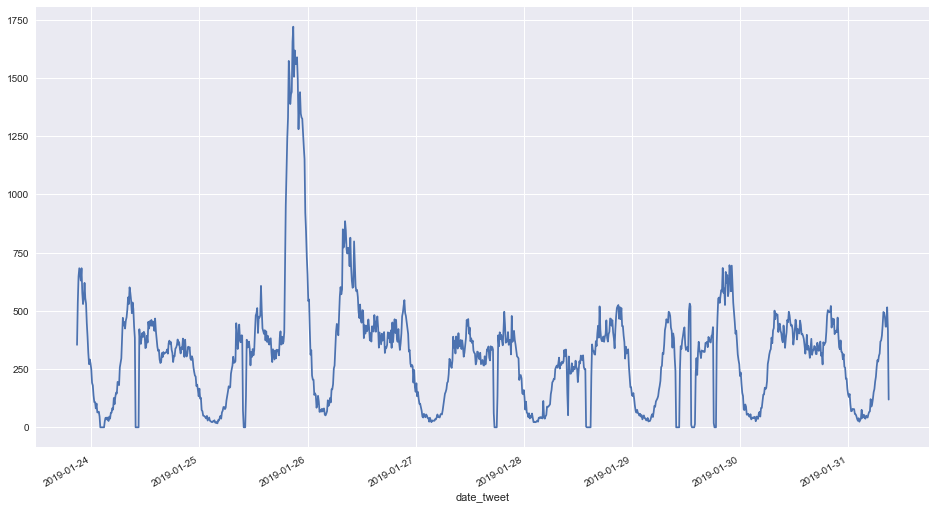

In [64]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [65]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [66]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [67]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
DukabaEvi          697
LeilaChujfi        574
WILBERGB           499
WILLJ84753699      496
Barreja            459
AnakareriNannaE    437
douglasemolina     424
merv59             362
GLORIDMQ           349
DonMarenco         133
dtype: int64

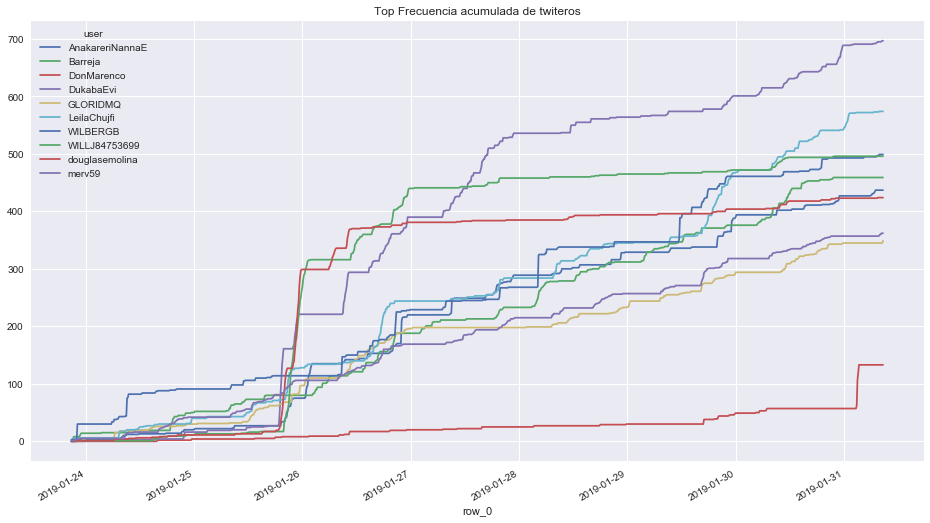

In [68]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [69]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [70]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

DanielSamperO     36350
MafeCarrascal     33676
Uriasv            33459
ClaudiaLopez      29072
natiibedoya       17579
IvanDuque         16641
petrogustavo      14160
navarrowolff      13270
angelamrobledo    11436
VickyDavilaH      11421
dtype: int64

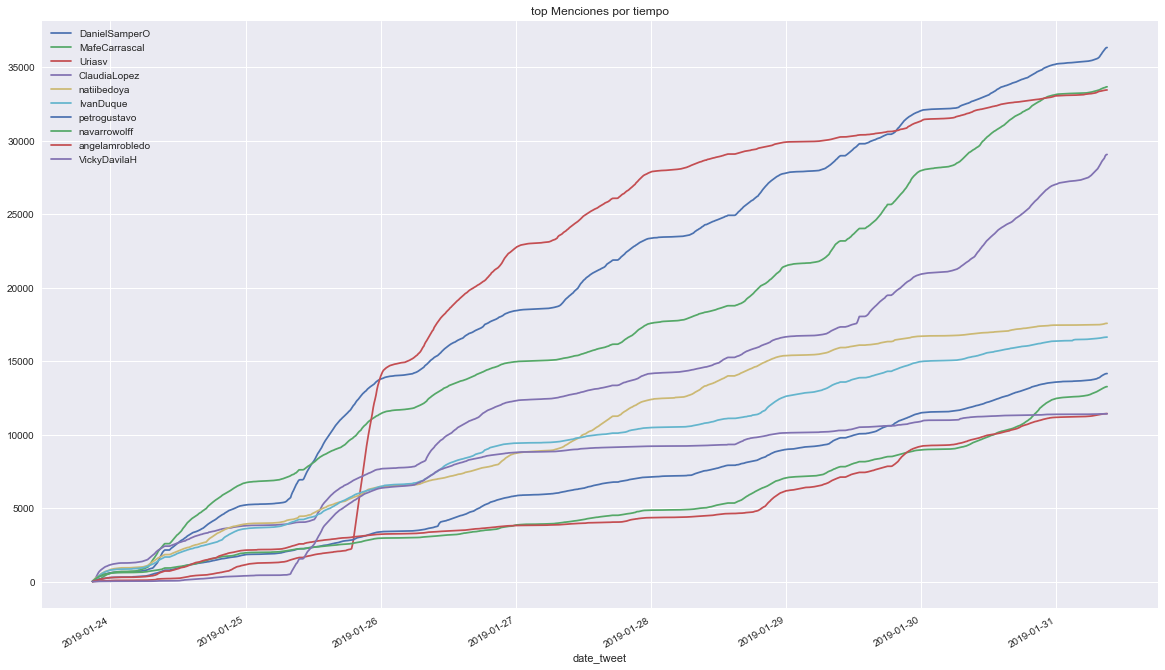

In [71]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

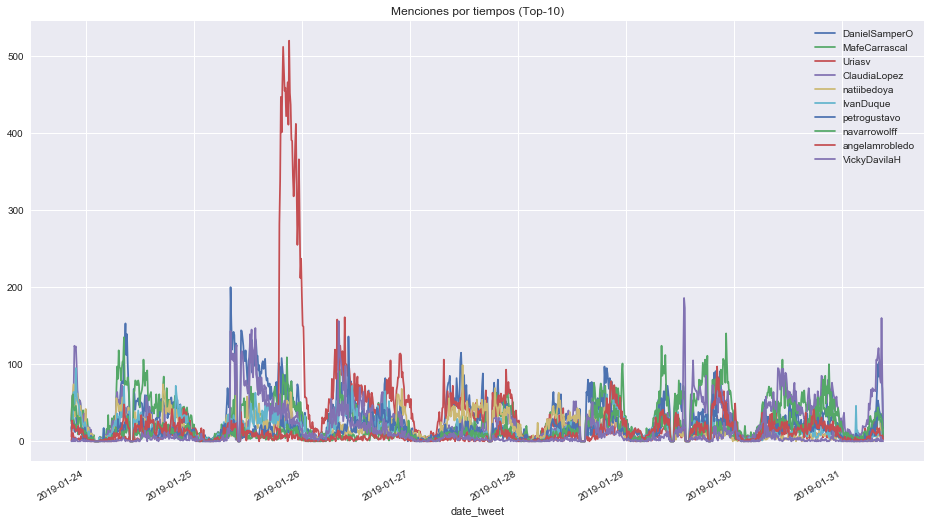

In [75]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [41]:
mat_size=75
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,DanielSamperO,MafeCarrascal,Uriasv,ClaudiaLopez,natiibedoya,IvanDuque,petrogustavo,navarrowolff,angelamrobledo,VickyDavilaH,...,CenDemoniaco,SenorCaicedo,CesarPachonAgro,GiordanoBrunoFi,ElChapinPrensa,AlbertoBernalLe,SamuelHoyosM,pineda0ruiz,juan_alies,BluRadioCo
LeilaChujfi,45.0,45.0,55.0,4.0,8.0,12.0,74.0,2.0,7.0,5.0,...,3.0,6.0,0.0,25.0,0.0,0.0,0.0,1.0,26.0,3.0
Barreja,25.0,28.0,46.0,13.0,5.0,12.0,36.0,3.0,13.0,9.0,...,4.0,9.0,1.0,23.0,0.0,0.0,2.0,5.0,21.0,1.0
merv59,18.0,25.0,29.0,8.0,0.0,22.0,22.0,2.0,6.0,0.0,...,2.0,9.0,1.0,12.0,0.0,0.0,0.0,5.0,36.0,1.0
WILBERGB,90.0,116.0,19.0,20.0,67.0,9.0,21.0,5.0,4.0,1.0,...,2.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0
AnakareriNannaE,17.0,13.0,133.0,8.0,4.0,19.0,22.0,3.0,43.0,7.0,...,7.0,22.0,5.0,8.0,0.0,0.0,4.0,3.0,4.0,1.0


In [42]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

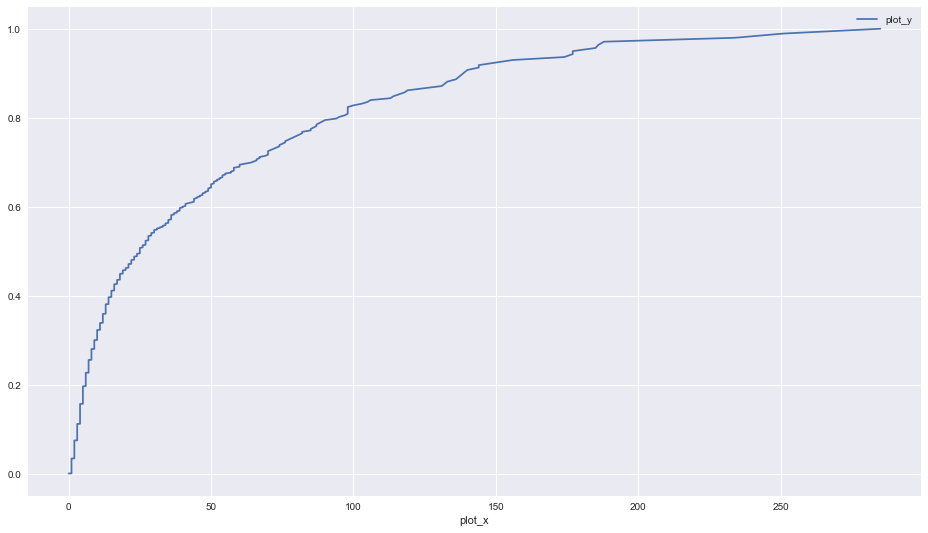

In [43]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [44]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

15.0
356


,tw_de,tw_para,freq
156,DukabaEvi,Uriasv,285.0
182,nancysuarezc,Uriasv,251.0
1575,LeilaChujfi,cielo_rusinque,234.0
157,douglasemolina,Uriasv,188.0
168,PedrozaHP,Uriasv,186.0
159,WILLJ84753699,Uriasv,185.0
1576,Barreja,cielo_rusinque,177.0
1360,Angelic11083708,FabianSanabriaS,177.0
165,MABG07194938,Uriasv,174.0
3600,LeilaChujfi,LeilaChujfi,156.0


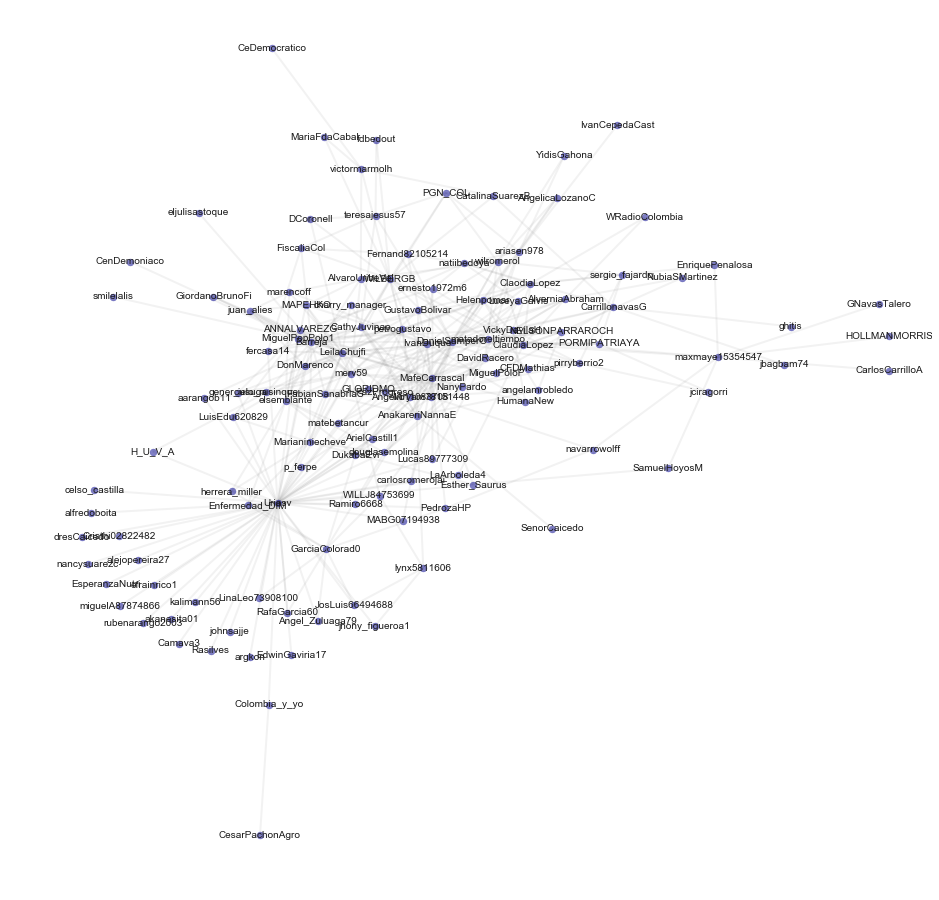

In [45]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

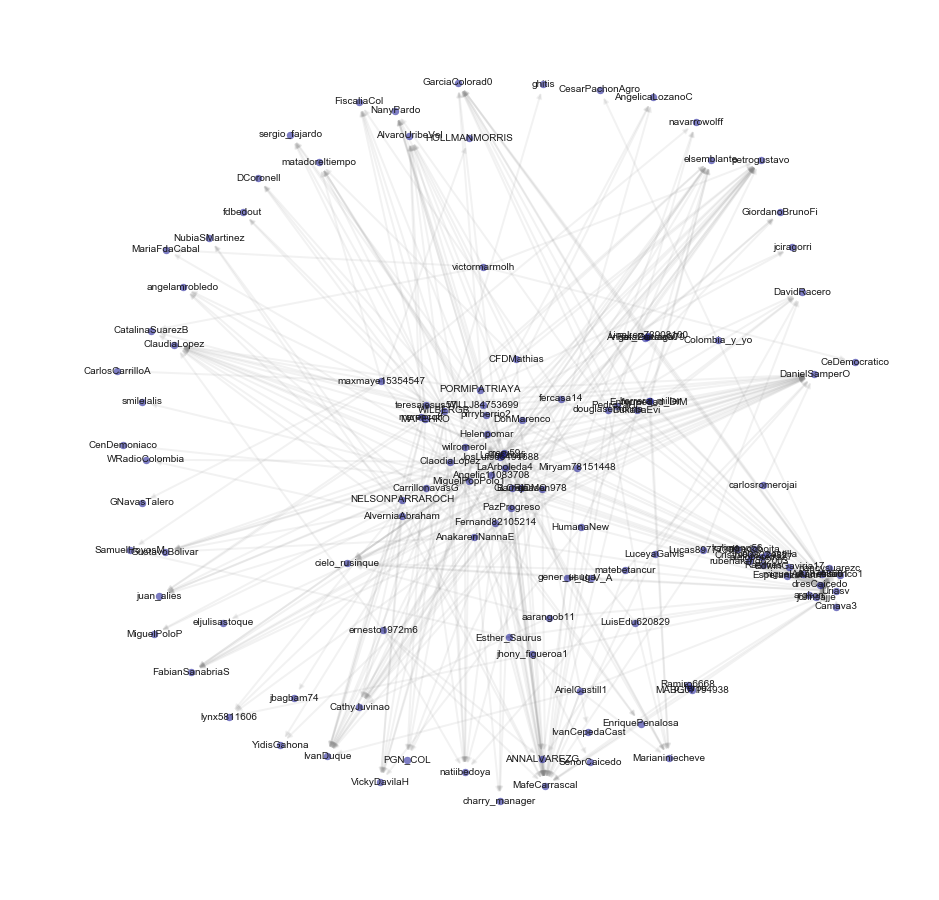

In [46]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

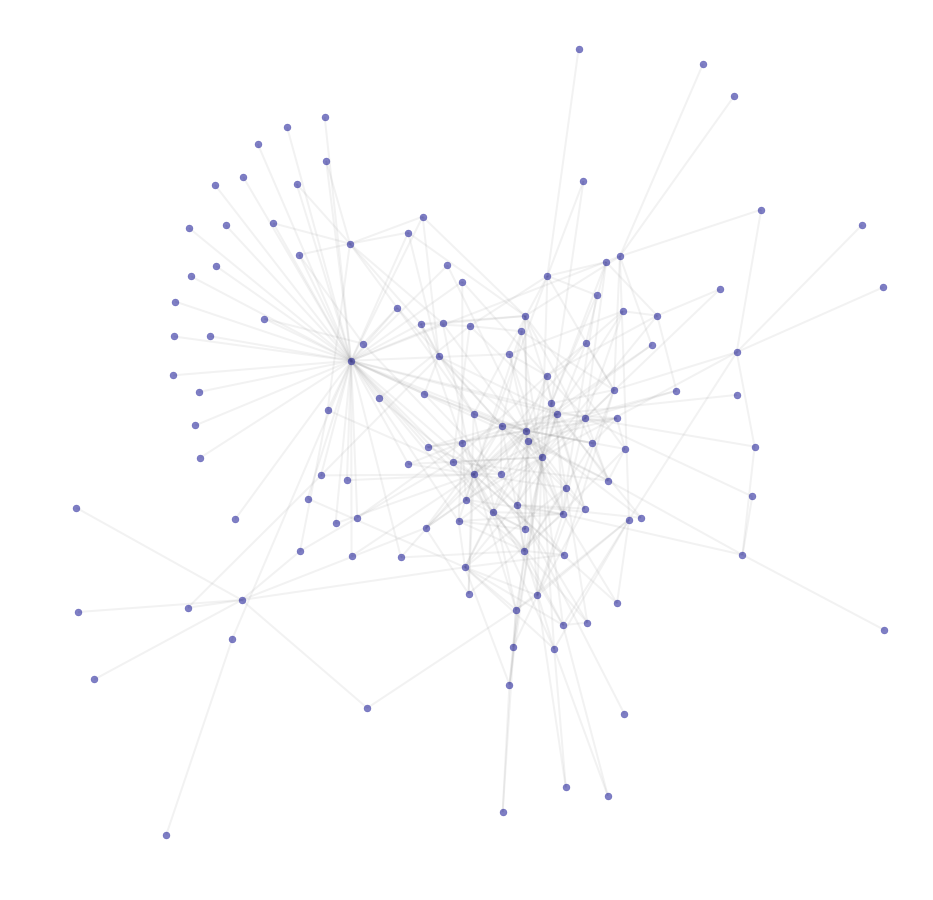

In [47]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()